**Question 4** :- Applying Fourier Transform, Butterworth filter and Gaussian filter

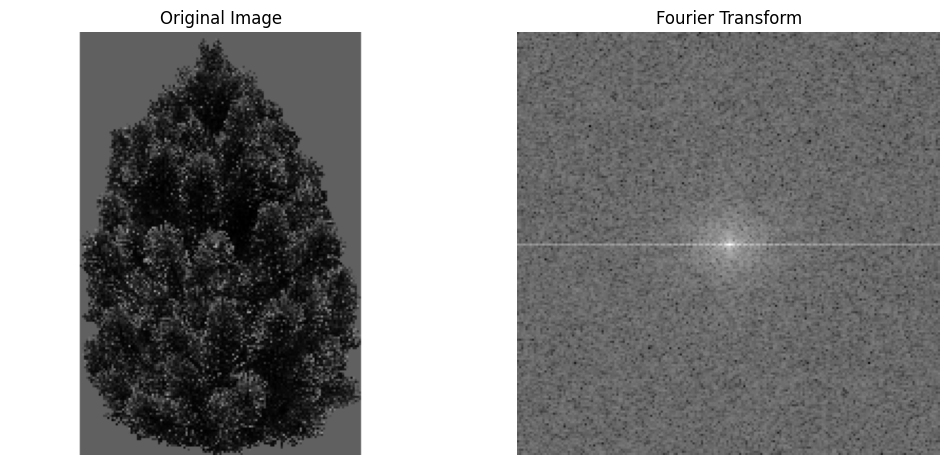

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path = 'tree.png'
img = Image.open(image_path).convert('L')
img_array = np.array(img)

# Apply Fourier Transform
f_transform = np.fft.fft2(img_array)  # 2D Fourier Transform
f_transform_shifted = np.fft.fftshift(f_transform)  # Shift zero frequency components to the center

# Compute magnitude spectrum
magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)  # Log scale for better visibility

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Fourier Transform')
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')

plt.show()

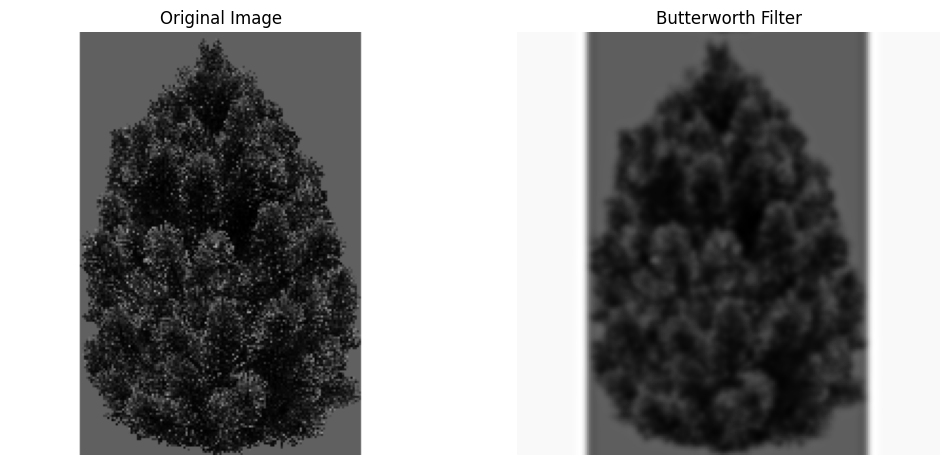

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def butterworth_lowpass(cutoff, shape, order=2):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2  # center

    # Create a grid of (x, y) coordinates
    x = np.linspace(-ccol, ccol-1, cols)
    y = np.linspace(-crow, crow-1, rows)
    X, Y = np.meshgrid(x, y)

    # Calculate the distance from the center
    D = np.sqrt(X**2 + Y**2)

    # Butterworth filter formula
    H = 1 / (1 + (D / cutoff)**(2 * order))
    return H

# Load the image
image_path = 'tree.png'
img = Image.open(image_path).convert('L')  # Convert to grayscale
img_array = np.array(img)

# Apply Fourier Transform
f_transform = np.fft.fft2(img_array)  # 2D Fourier Transform
f_transform_shifted = np.fft.fftshift(f_transform)  # Shift zero frequency components to the center

# Create the Butterworth filter
cutoff_frequency = 30  # You can adjust this value
order = 2  # Order of the filter
butterworth_filter = butterworth_lowpass(cutoff_frequency, img_array.shape, order)

# Apply the Butterworth filter in the frequency domain
filtered_transform = f_transform_shifted * butterworth_filter

# Inverse Fourier Transform to get the filtered image
filtered_transform_ishifted = np.fft.ifftshift(filtered_transform)  # Shift back
filtered_image = np.fft.ifft2(filtered_transform_ishifted)  # Inverse FFT
filtered_image = np.abs(filtered_image)  # Get magnitude

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Butterworth Filter')
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.show()

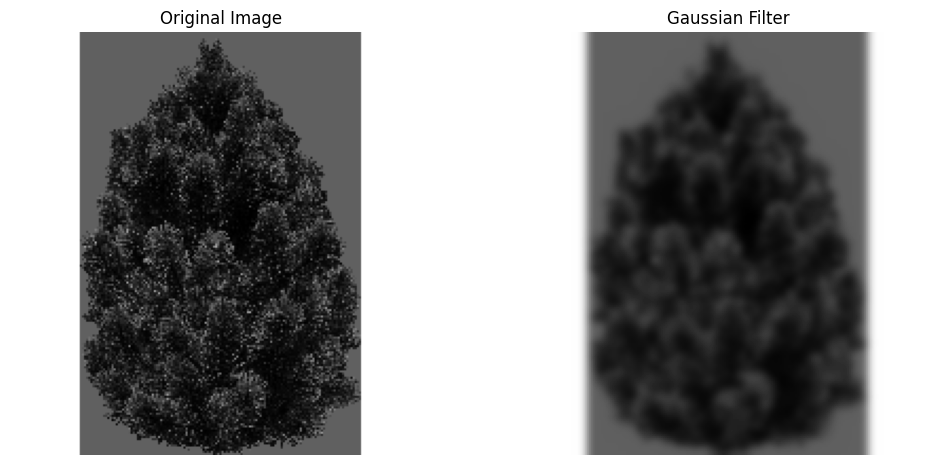

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import gaussian_filter

# Load the image
image_path = 'tree.png'
img = Image.open(image_path).convert('L')  # Convert to grayscale
img_array = np.array(img)

# Apply Gaussian Filter
sigma = 2  # Standard deviation for Gaussian filter
filtered_image = gaussian_filter(img_array, sigma=sigma)

# Plot the original and filtered images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Gaussian Filter')
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.show()